# Simulate correlation matrix figures

This figure is modeled on https://events.neurolibre.org/myelin-meta-analysis/03/meta_analysis.html#figure-6.

In [1]:
%matplotlib inline
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
measures = {
    'Diffusion': [
        'AD',
        'AWF',
        'FA',
        'MD',
        'MK',
        'RD',
        'RDe',
        'RK',
    ],
    'Magnetization transfer': [
        'MTR',
        'ihMTR',
    ],
    'T1 relaxometry': [
        'T1',
    ],
    'T1w/T2w': [
        'Mw',
        'Mwc',
    ],
    'Quantitative Susceptibility Mapping': [
        'X-sep',
        "X-sep+R2'",
    ],
}
N_SUBJECTS = 10
N_SESSIONS = 2
n_metrics = np.sum([len(v) for v in measures.values()])

In [3]:
metrics = list(measures.values())
metrics = [x for xs in metrics for x in xs]
metric_comparisons = list(combinations(metrics, 2))

df = pd.DataFrame(
    columns=[
        'participant_id',
        'session_id_source',
        'session_id_target',
        'source',
        'target',
        'correlation',
    ],
)
counter = 0
for i_subject in range(1, N_SUBJECTS + 1):
    for session1, session2 in [(1, 1), (1, 2), (2, 2)]:
        if session1 != session2:
            for metric in metrics:
                corr = (np.random.random() * 2) - 1
                row = [i_subject, session1, session2, metric, metric, corr]
                df.loc[counter] = row
                counter += 1

        for metric1, metric2 in metric_comparisons:
            corr = (np.random.random() * 2) - 1
            row = [i_subject, session1, session2, metric1, metric2, corr]
            df.loc[counter] = row
            counter += 1

In [4]:
df.head()

,participant_id,session_id_source,session_id_target,source,target,correlation
0,1,1,1,AD,AWF,0.561631
1,1,1,1,AD,FA,-0.105311
2,1,1,1,AD,MD,-0.935063
3,1,1,1,AD,MK,-0.540237
4,1,1,1,AD,RD,-0.190339


In [5]:
corrmat = pd.DataFrame(
    index=metrics,
    columns=metrics,
    data=np.zeros((len(metrics), len(metrics))),
)
countmat = pd.DataFrame(
    index=metrics,
    columns=metrics,
    data=np.zeros((len(metrics), len(metrics)), dtype=int),
)
for i_row, row in df.iterrows():
    source = row['source']
    target = row['target']
    z = np.arctanh(row['correlation'])
    corrmat.loc[source, target] += z
    countmat.loc[source, target] += 1
    if target != source:
        corrmat.loc[target, source] += z
        countmat.loc[target, source] += 1
        pass

corrmat = corrmat / countmat

In [6]:
countmat

,AD,AWF,FA,MD,MK,RD,RDe,RK,MTR,ihMTR,T1,Mw,Mwc,X-sep,X-sep+R2'
AD,10,30,30,30,30,30,30,30,30,30,30,30,30,30,30
AWF,30,10,30,30,30,30,30,30,30,30,30,30,30,30,30
FA,30,30,10,30,30,30,30,30,30,30,30,30,30,30,30
MD,30,30,30,10,30,30,30,30,30,30,30,30,30,30,30
MK,30,30,30,30,10,30,30,30,30,30,30,30,30,30,30
RD,30,30,30,30,30,10,30,30,30,30,30,30,30,30,30
RDe,30,30,30,30,30,30,10,30,30,30,30,30,30,30,30
RK,30,30,30,30,30,30,30,10,30,30,30,30,30,30,30
MTR,30,30,30,30,30,30,30,30,10,30,30,30,30,30,30
ihMTR,30,30,30,30,30,30,30,30,30,10,30,30,30,30,30


/var/folders/ph/w3cbhj9n16s9bx4l7gq3dq6m0000gn/T/ipykernel_81218/4038409408.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


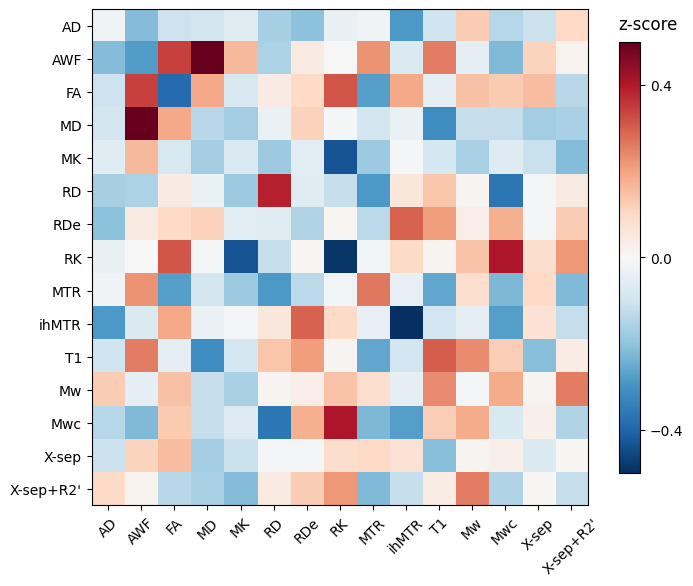

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(corrmat.values, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xticks(range(len(metrics)))
ax.set_xticklabels(metrics, rotation=45)
ax.set_yticks(range(len(metrics)))
ax.set_yticklabels(metrics)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, location='right', orientation='vertical', shrink=0.7)
cbar.ax.set_title('z-score', va='bottom', ha='left', loc='left')
cbar.ax.set_yticks([-0.4, 0, 0.4])
cbar.ax.spines[['right', 'top']].set_visible(False)
fig.show()